In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (4.0, 4.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
# Read 8-bit color image.
# This is an image in which the three channels are
# concatenated vertically.
im =  cv2.imread("emir.jpg", cv2.IMREAD_GRAYSCALE)

In [4]:
# Find the width and height of the color image
sz = im.shape
print(sz)

height = int(sz[0] / 3);
width = sz[1]

(1300, 500)


In [5]:
# Extract the three channels from the gray scale image
# and merge the three channels into one color image
im_color = np.zeros((height,width,3), dtype=np.uint8 )
for i in range(0,3) :
    im_color[:,:,i] = im[ i * height:(i+1) * height,:]

In [6]:
blue = im_color[:,:,0]
green = im_color[:,:,1]
red = im_color[:,:,2]

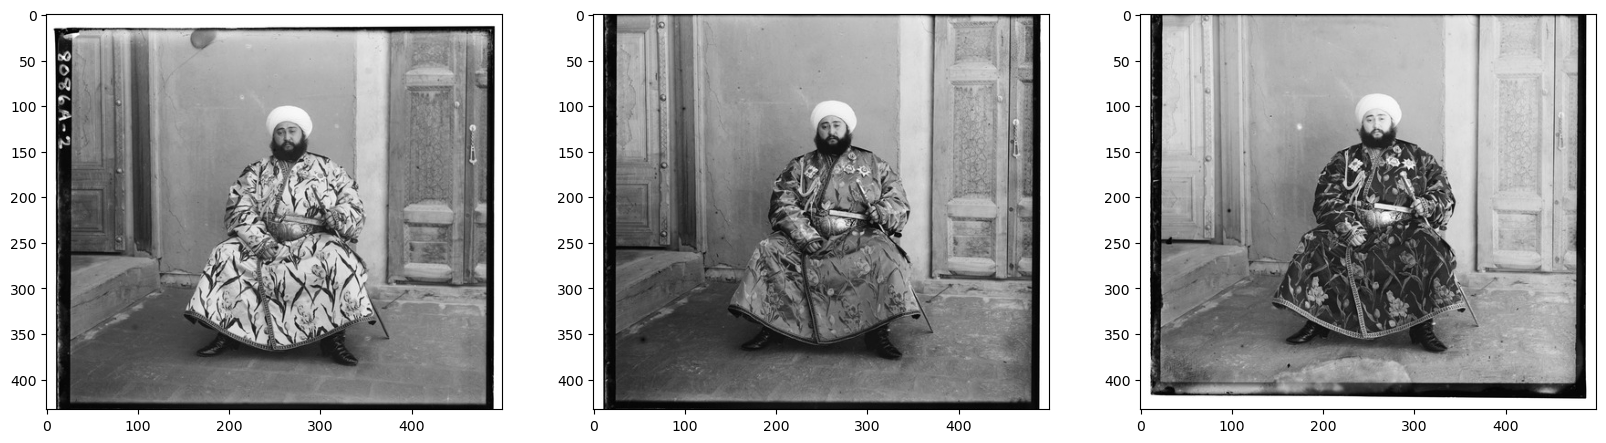

In [7]:
plt.figure(figsize=(20,12))
plt.subplot(1,3,1)
plt.imshow(blue)
plt.subplot(1,3,2)
plt.imshow(green)
plt.subplot(1,3,3)
plt.imshow(red)
plt.show()

In [8]:
MAX_FEATURES = 5000


In [9]:
# Detect ORB features and compute descriptors.
orb = cv2.ORB_create(MAX_FEATURES)
keypointsGreen, descriptorsGreen = orb.detectAndCompute(green, None)
keypointsBlue, descriptorsBlue = orb.detectAndCompute(blue, None)
keypointsRed, descriptorsRed = orb.detectAndCompute(red, None)

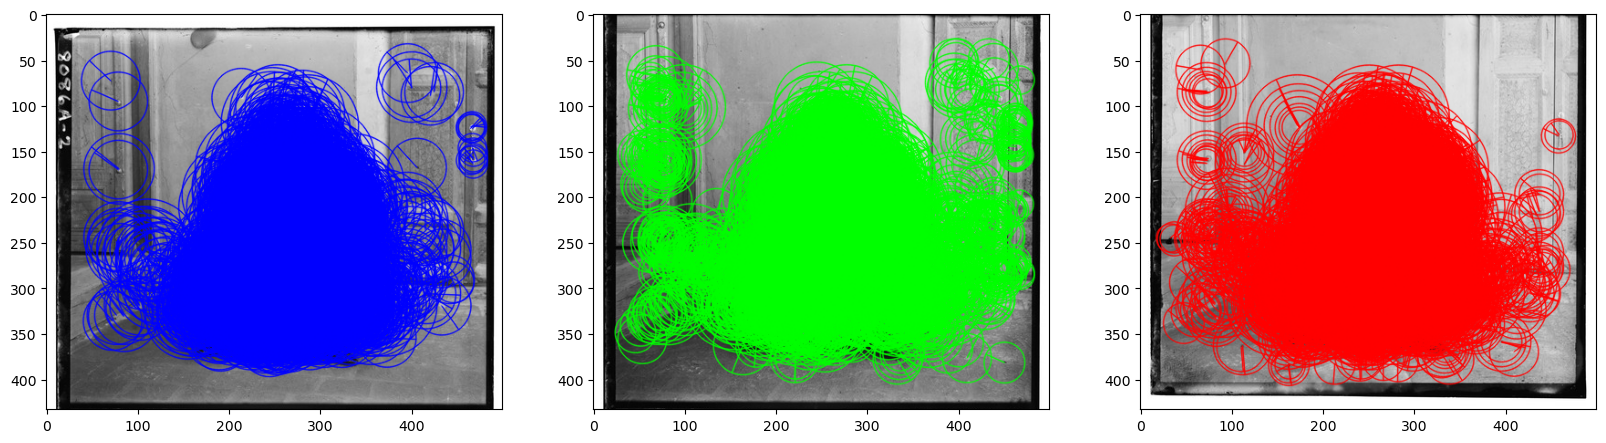

In [10]:
plt.figure(figsize=[20,10])
img2 = cv2.drawKeypoints(blue, keypointsBlue, None, color=(255,0,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(131);plt.imshow(img2[...,::-1])

img2 = cv2.drawKeypoints(green, keypointsGreen, None, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(132);plt.imshow(img2[...,::-1])

img2 = cv2.drawKeypoints(red, keypointsRed, None, color=(0,0,255), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(133);plt.imshow(img2[...,::-1])

# <font style="color:rbg(25,25,255)"> Use BFMatcher </font>

In [11]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
# Match descriptors.
matchbfbg = bf.match(descriptorsGreen,descriptorsBlue)

In [12]:
# Sort them in the order of their distance.
matchbfbg = sorted(matchbfbg, key = lambda x:x.distance)


In [13]:
GOOD_MATCH_PERCENT = 0.25
# Remove not so good matches
numGoodMatches = int(len(matchbfbg) * GOOD_MATCH_PERCENT)
matchbfbg = matchbfbg[:numGoodMatches]
print(numGoodMatches)

1045


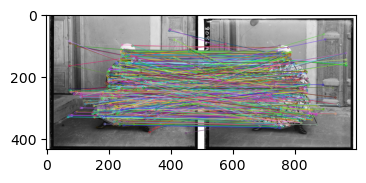

(<matplotlib.image.AxesImage at 0x1de3f221a30>, None)

In [14]:
# Draw first 10 matches.
imgbfbg = cv2.drawMatches(green,keypointsGreen,blue,keypointsBlue,matchbfbg[:numGoodMatches],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(imgbfbg),plt.show()

In [15]:
# Extract location of good matches
pointsg = np.zeros((len(matchbfbg), 2), dtype=np.float32)
pointsb = np.zeros((len(matchbfbg), 2), dtype=np.float32)
for i, match in enumerate(matchbfbg):
    pointsg[i, :] = keypointsGreen[match.queryIdx].pt
    pointsb[i, :] = keypointsBlue[match.trainIdx].pt

In [16]:
# Find homography
hbfbg, mask = cv2.findHomography(pointsb, pointsg, cv2.RANSAC)


In [17]:
# Use homography
height, width = green.shape
imbfb = cv2.warpPerspective(blue, hbfbg, (width, height))

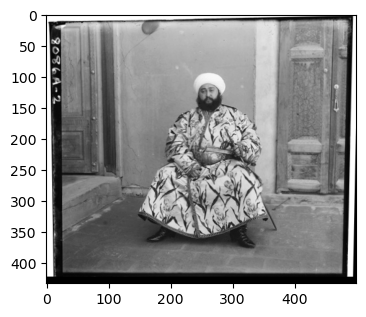

In [18]:
plt.imshow(imbfb)

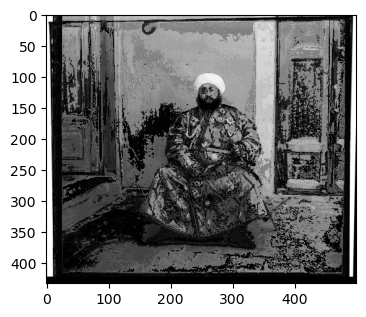

In [19]:
bgoverlap=cv2.bitwise_and(green,imbfb)
plt.imshow(bgoverlap)

In [20]:
# Match descriptors.
matchbfrg = bf.match(descriptorsGreen,descriptorsRed)

In [21]:
# Sort them in the order of their distance.
matchbfrg = sorted(matchbfrg, key = lambda x:x.distance)

In [22]:
# Remove not so good matches
numGoodMatches = int(len(matchbfrg) * GOOD_MATCH_PERCENT)
matchbfrg = matchbfrg[:numGoodMatches]
print(numGoodMatches)

1045


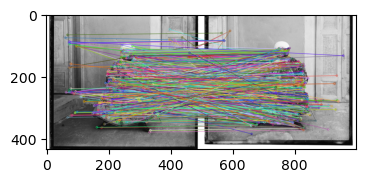

(<matplotlib.image.AxesImage at 0x1de40270370>, None)

In [23]:
# Draw first 10 matches.
imgbfrg = cv2.drawMatches(green,keypointsGreen,red,keypointsRed,matchbfrg[:numGoodMatches],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(imgbfrg),plt.show()

In [24]:
# Extract location of good matches
pointsg = np.zeros((len(matchbfrg), 2), dtype=np.float32)
pointsr = np.zeros((len(matchbfrg), 2), dtype=np.float32)
for i, match in enumerate(matchbfrg):
    pointsg[i, :] = keypointsGreen[match.queryIdx].pt
    pointsr[i, :] = keypointsRed[match.trainIdx].pt

In [25]:
# Find homography
hbfrg, mask = cv2.findHomography(pointsr, pointsg, cv2.RANSAC)


In [26]:
# Use homography
height, width = green.shape
imbfr = cv2.warpPerspective(red, hbfrg, (width, height))

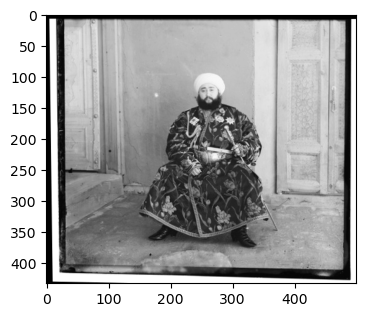

In [27]:
plt.imshow(imbfr)

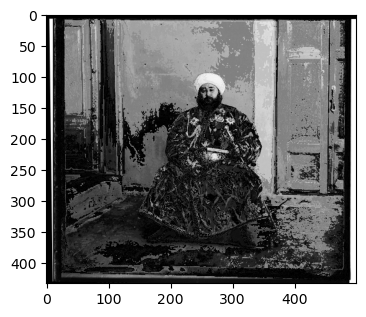

In [28]:
sunglass = cv2.bitwise_and(green,imbfr)
plt.imshow(sunglass)

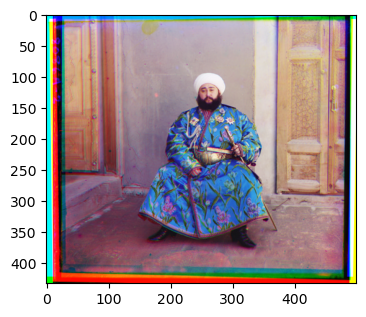

In [29]:
alignbf=cv2.merge((imbfb, green, imbfr))
plt.imshow(alignbf[:,:,::-1])

# <font style="color:rgb(25,25,255)">Use Descriptor Matcher</font>

In [30]:
# Match features.
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)


# <font style="color:rgb(25,25,255)"> Match Blue channel to Green channel</font>

In [31]:
matchesBlueGreen = matcher.match(descriptorsGreen, descriptorsBlue, None)

In [32]:

# Sort matches by score
matchesBlueGreen.sort(key=lambda x: x.distance, reverse=False)


In [33]:
GOOD_MATCH_PERCENT = 0.15
# Remove not so good matches
numGoodMatches = int(len(matchesBlueGreen) * GOOD_MATCH_PERCENT)
matchesBlueGreen = matchesBlueGreen[:numGoodMatches]

In [34]:
print(len(matchesBlueGreen))

627


In [35]:
# Draw top matches
#imMatchesBlueGreen=cv2.drawMatches(green,keypointsGreen,blue,keypointsBlue,matchesBlueGreen,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
imMatchesBlueGreen=cv2.drawMatches(green,keypointsGreen,blue,keypointsBlue,matchesBlueGreen,None)

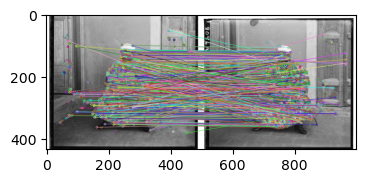

In [36]:
plt.imshow(imMatchesBlueGreen[:,:,::-1])

In [37]:
# Extract location of good matches
pointsg = np.zeros((len(matchesBlueGreen), 2), dtype=np.float32)
pointsb = np.zeros((len(matchesBlueGreen), 2), dtype=np.float32)

In [38]:
for i, match in enumerate(matchesBlueGreen):
    pointsg[i, :] = keypointsGreen[match.queryIdx].pt
    pointsb[i, :] = keypointsBlue[match.trainIdx].pt

In [39]:
# Find homography
hbg, mask = cv2.findHomography(pointsg, pointsb, cv2.RANSAC)


In [40]:
# Use homography
height, width = green.shape
imbReg = cv2.warpPerspective(blue, hbg, (width, height))

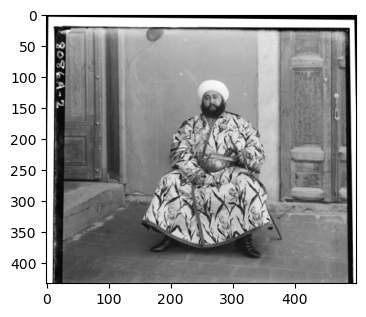

In [41]:
plt.imshow(imbReg)

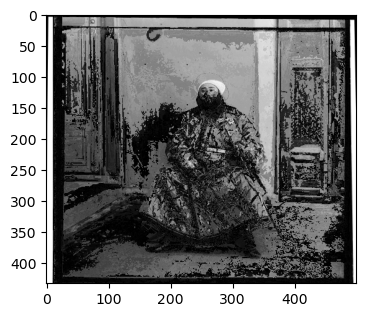

In [42]:
sunglass = cv2.bitwise_and(green,imbReg)
plt.imshow(sunglass)

# <font style="color:rgb(25,25,255)">Match Red channel to Green channel</font>

In [43]:
matchesRedGreen = matcher.match(descriptorsGreen, descriptorsRed, None)

In [44]:
# Remove not so good matches
numGoodMatches = int(len(matchesRedGreen) * GOOD_MATCH_PERCENT)
matchesRedGreen = matchesRedGreen[:numGoodMatches]

In [45]:
print(numGoodMatches)

627


In [46]:
# Draw first 10 matches.
imMatchesRedGreen = cv2.drawMatches(green,keypointsGreen,red,keypointsRed,matchesRedGreen,None)


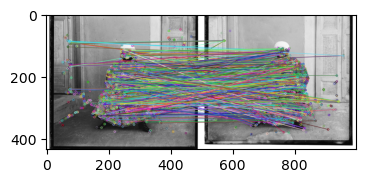

In [47]:
plt.imshow(imMatchesRedGreen[:,:,::-1])

In [48]:
# Extract location of good matches
pointsg = np.zeros((len(matchesRedGreen), 2), dtype=np.float32)
pointsr = np.zeros((len(matchesRedGreen), 2), dtype=np.float32)

In [49]:
for i, match in enumerate(matchesRedGreen):
    pointsg[i, :] = keypointsGreen[match.queryIdx].pt
    pointsr[i, :] = keypointsRed[match.trainIdx].pt

In [50]:
# Find homography
hrg, mask = cv2.findHomography(pointsg, pointsr, cv2.RANSAC)

In [51]:
# Use homography
height, width = green.shape
imrReg = cv2.warpPerspective(red, hrg, (width, height))

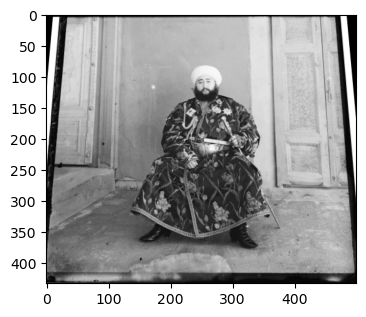

In [52]:
plt.imshow(imrReg)

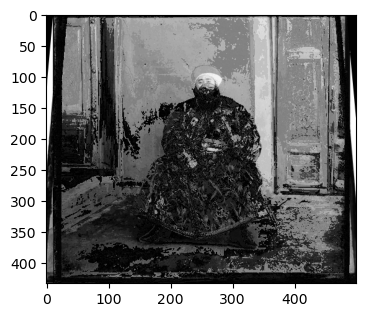

In [53]:
sunglass = cv2.bitwise_and(green,imrReg)
plt.imshow(sunglass)

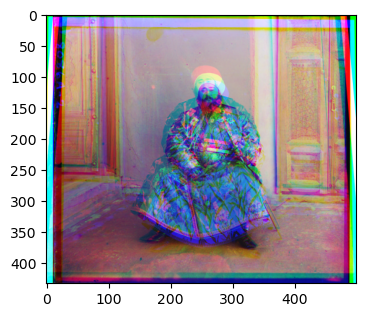

In [54]:
aligned=cv2.merge((imbReg, green, imrReg))
plt.imshow(aligned[:,:,::-1])

# <font style="color:rgb(25,25,255)">Use FLANN Lowe match</font>

In [55]:
#While using ORB

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 50)
search_params = dict(checks = 6000)
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [56]:
matchgb = flann.knnMatch(np.float32(descriptorsGreen),np.float32(descriptorsBlue),k=2)

In [57]:
# store all the good matches as per Lowe's ratio test.
LowesRatio=0.9
goodgb = []
for m,n in matchgb:
    if m.distance < LowesRatio*n.distance:
        goodgb.append(m)

In [58]:
MIN_MATCH_COUNT=20
RANSACthresh=3.0
if len(goodgb)>MIN_MATCH_COUNT:
    g_pts = np.float32([ keypointsGreen[m.queryIdx].pt for m in goodgb ]).reshape(-1,1,2)
    b_pts = np.float32([ keypointsBlue[m.trainIdx].pt for m in goodgb ]).reshape(-1,1,2)
    Mgb, maskgb = cv2.findHomography(g_pts, b_pts, cv2.RANSAC,RANSACthresh)
    matchesMask = maskgb.ravel().tolist()
    
else:
    print( "Not enough matches are found - {}/{}".format(len(goodgb), MIN_MATCH_COUNT) )
    matchesMask = None

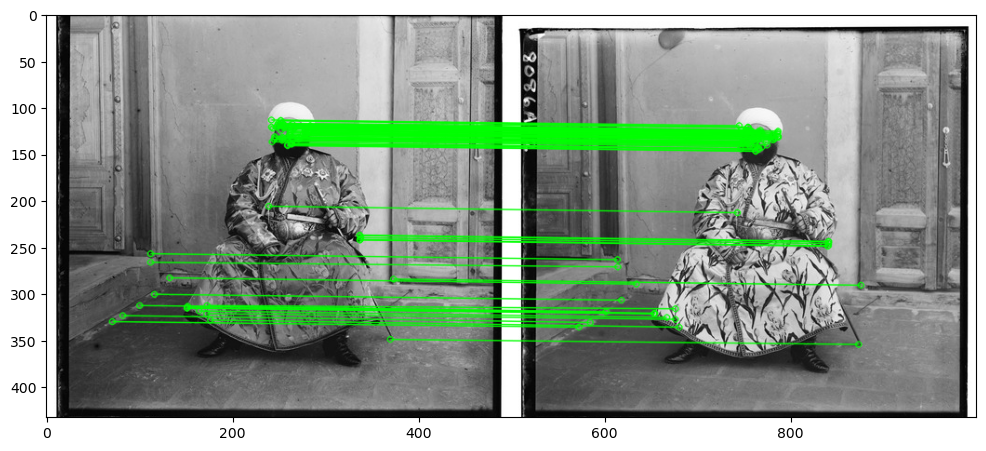

(<matplotlib.image.AxesImage at 0x1de4497a3a0>, None)

In [59]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(green,keypointsGreen,blue,keypointsBlue,goodgb,None,**draw_params)

plt.figure(figsize=(12,12))
plt.imshow(img3[...,::-1]),plt.show()

In [60]:
# Use homography
height, width = green.shape
FLANNbReg = cv2.warpPerspective(blue, Mgb, (width, height))

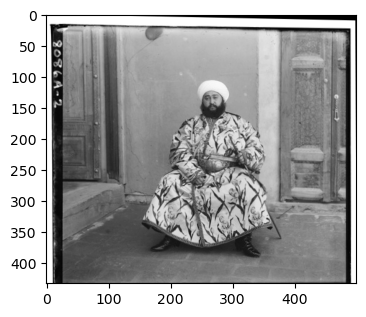

In [61]:
plt.imshow(FLANNbReg)

In [62]:
matchgr = flann.knnMatch(np.float32(descriptorsGreen),np.float32(descriptorsRed),k=2)

In [63]:

# store all the good matches as per Lowe's ratio test.
goodgr = []
for m,n in matchgr:
    if m.distance < LowesRatio*n.distance:
        goodgr.append(m)

In [64]:
MIN_MATCH_COUNT=20

if len(goodgr)>MIN_MATCH_COUNT:
    g_pts = np.float32([ keypointsGreen[m.queryIdx].pt for m in goodgr ]).reshape(-1,1,2)
    r_pts = np.float32([ keypointsRed[m.trainIdx].pt for m in goodgr ]).reshape(-1,1,2)
    Mgr, maskgr = cv2.findHomography(g_pts, r_pts, cv2.RANSAC,RANSACthresh)
    matchesMask = maskgr.ravel().tolist()
    
else:
    print( "Not enough matches are found - {}/{}".format(len(goodgr), MIN_MATCH_COUNT) )
    matchesMask = None

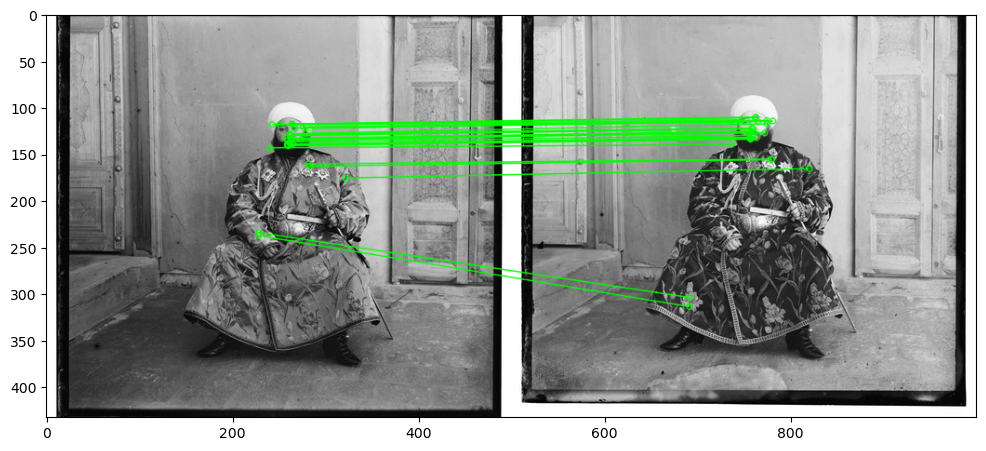

(<matplotlib.image.AxesImage at 0x1de44bef940>, None)

In [65]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
imgr = cv2.drawMatches(green,keypointsGreen,red,keypointsRed,goodgr,None,**draw_params)

plt.figure(figsize=(12,12))
plt.imshow(imgr[...,::-1]),plt.show()

In [66]:
# Use homography
height, width = green.shape
FLANNrReg = cv2.warpPerspective(red, Mgb, (width, height))

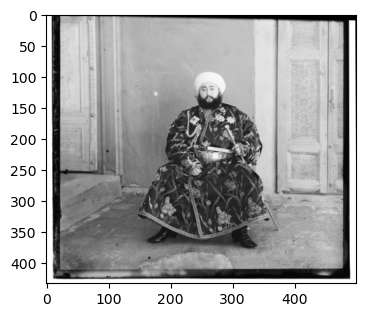

In [67]:
plt.imshow(FLANNrReg)

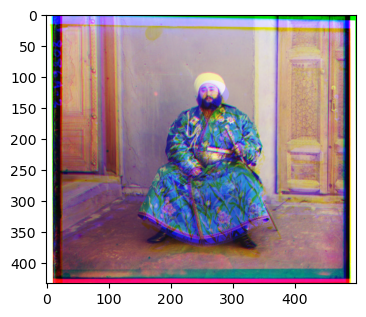

In [68]:
alignFLANN=cv2.merge((FLANNbReg, green, FLANNrReg))
plt.imshow(alignFLANN[:,:,::-1])